In [ ]:
# Google Colab에서 Kaggle API를 사용하기 위한 라이브러리 설치
!pip install kaggle

# Kaggle API 토큰 업로드
from google.colab import files
files.upload()

In [ ]:
# 업로드한 Kaggle API 토큰 파일 확인
ls -1ha kaggle.json

kaggle.json


In [ ]:
# Kaggle API 토큰을 사용자 디렉토리로 복사하고 권한 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle에서 데이터셋 다운로드
!kaggle datasets download -d hetulmehta/website-classification

100% 2.00M/2.00M [00:00<00:00, 2.94MB/s]
100% 2.00M/2.00M [00:00<00:00, 2.57MB/s]


In [ ]:
!ls

kaggle.json  sample_data  website-classification.zip


In [ ]:
# 다운로드한 데이터셋 압축 해제
!unzip website-classification.zip

Archive:  website-classification.zip
  inflating: website_classification.csv  


In [ ]:
# 모델 성능 평가를 위한 패키지 및 라이브러리 불러오기
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# 데이터셋 로드
wc_data = pd.read_csv('/content/website_classification.csv')
wc_data

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [ ]:
# 'Category' 컬럼 값에 따라 'Outlook' 컬럼 생성
wc_data.loc[wc_data['Category'] == 'Streaming Services', 'Outlook'] = 1
wc_data.loc[wc_data['Category'] != 'Streaming Services', 'Outlook'] = 0

In [ ]:
wc_data

,Unnamed: 0,website_url,cleaned_website_text,Category,Outlook
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel,1.0
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel,1.0
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel,1.0
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel,1.0
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel,1.0
...,...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult,1.0
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult,1.0
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult,1.0
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult,1.0


In [ ]:
# 독립 변수(X)와 종속 변수(y) 설정
X = np.array(pd.DataFrame(wc_data, columns=['cleaned_website_text']))
y = np.array(pd.DataFrame(wc_data, columns=['Outlook']))

In [ ]:
# 훈련 데이터셋과 테스트 데이터셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# TF-IDF 벡터화 및 의사결정 트리 모델 학습
X_train_df = pd.DataFrame(X_train, columns=['cleaned_website_text'])
X_test_df = pd.DataFrame(X_test, columns=['cleaned_website_text'])
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_df['cleaned_website_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test_df['cleaned_website_text'])
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf, y_train)

DecisionTreeClassifier()

In [ ]:
# 테스트 데이터에 대한 모델 평가
predictions = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)

In [ ]:
print(f"Accuracy(정확도): {accuracy}")
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy(정확도): 0.9630681818181818
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       328
         1.0       0.76      0.67      0.71        24

    accuracy                           0.96       352
   macro avg       0.87      0.83      0.85       352
weighted avg       0.96      0.96      0.96       352

[[323   5]
 [  8  16]]


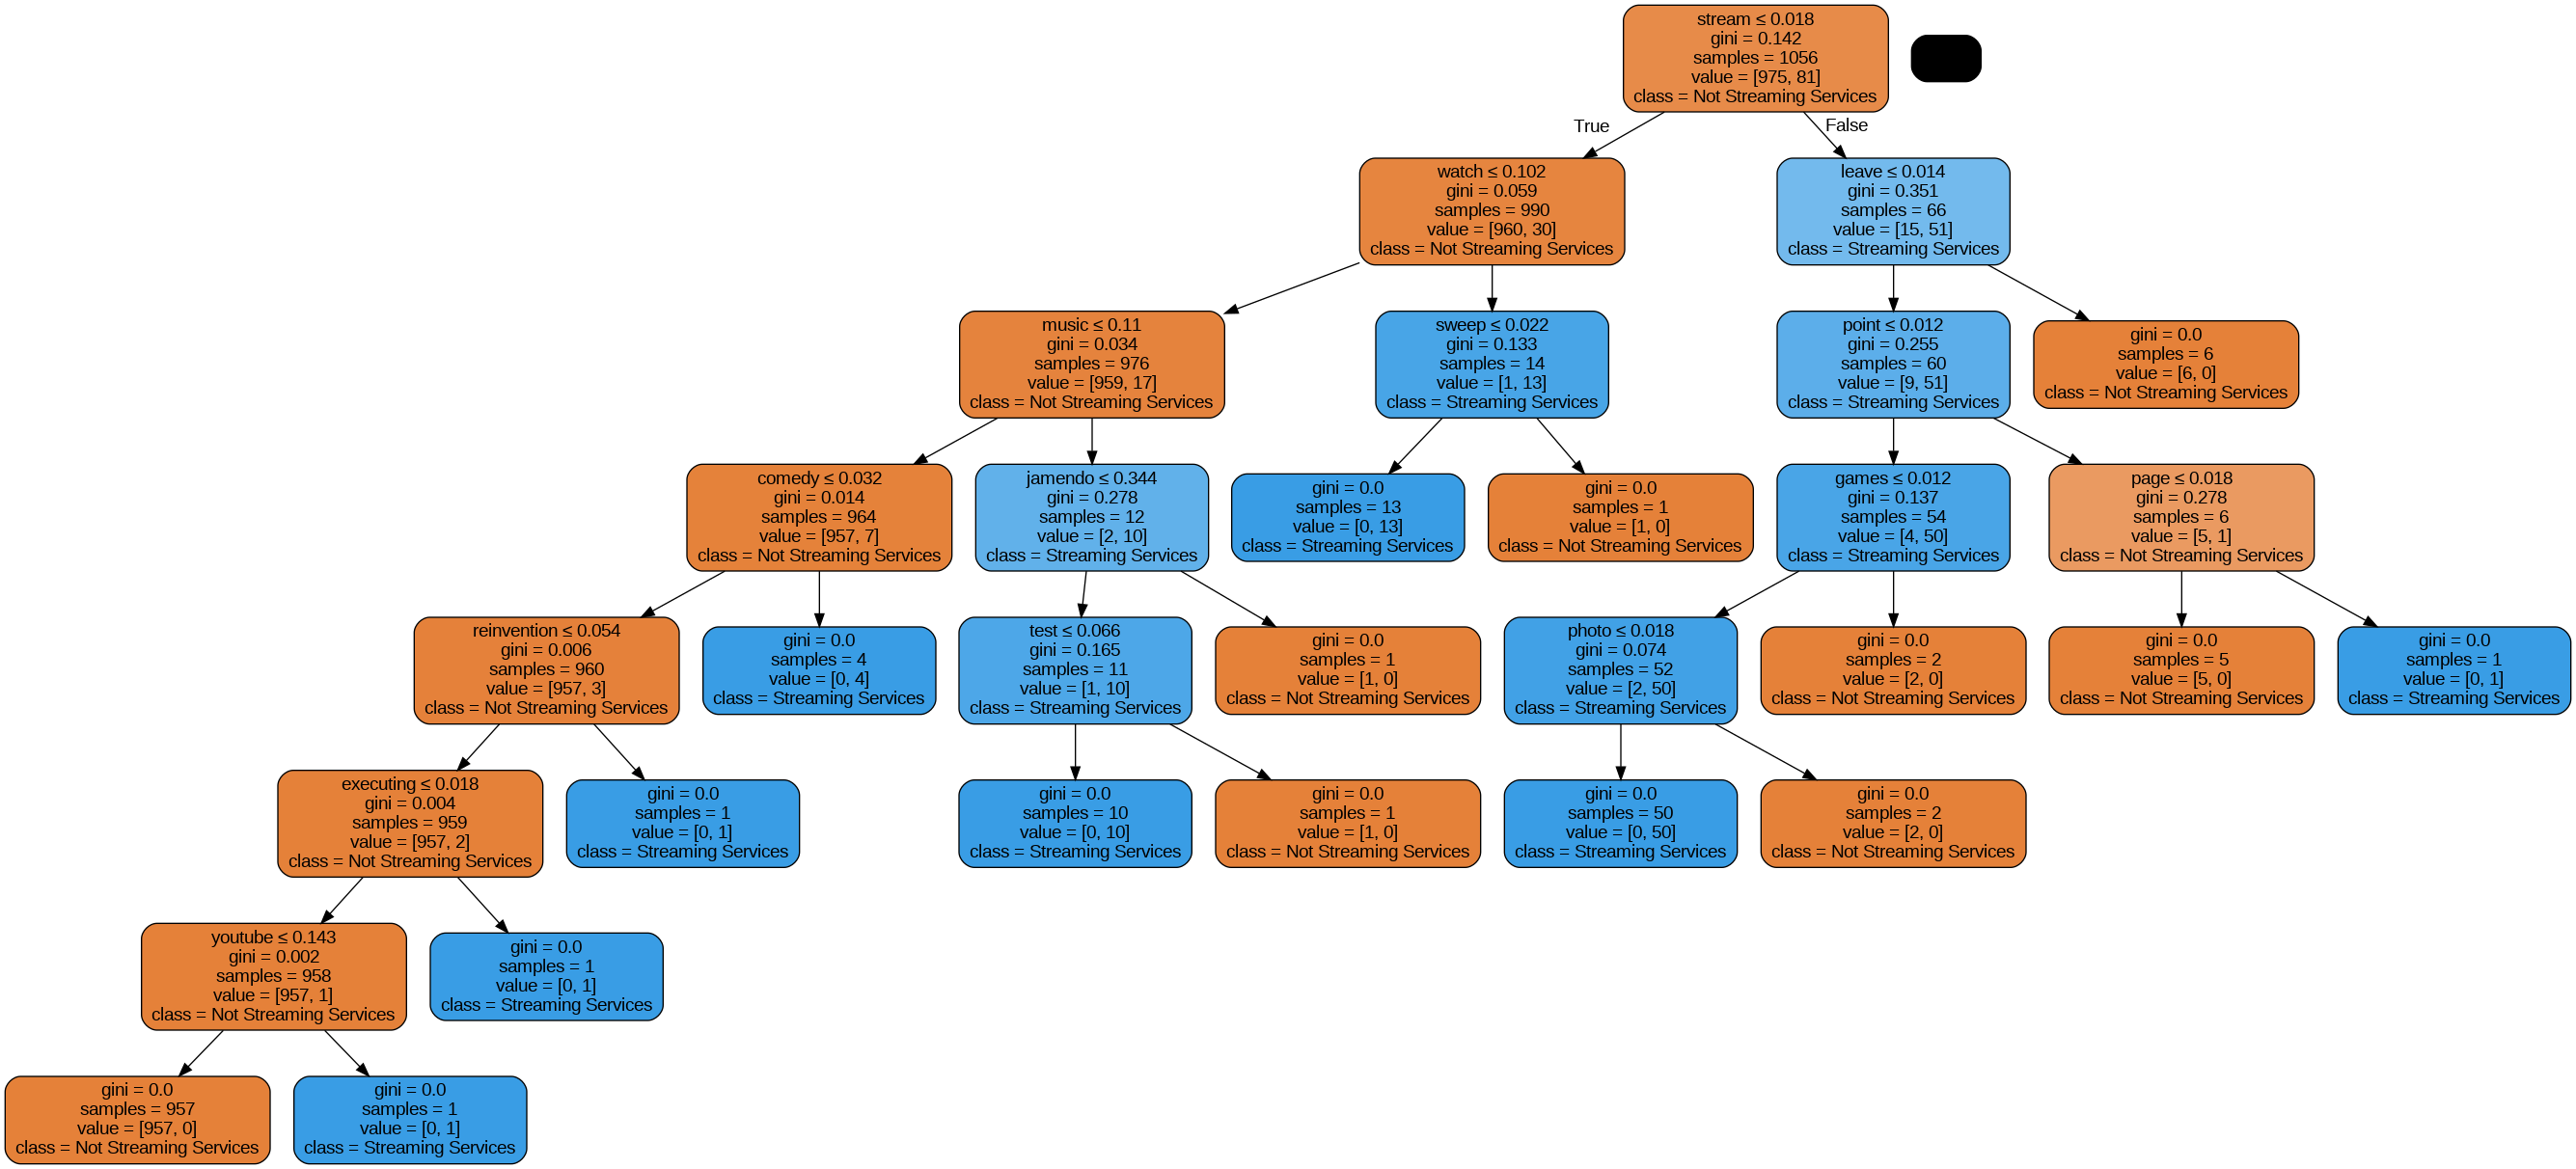

In [ ]:
# 의사결정 트리 시각화
feature_names = wc_data.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Not Streaming Services', 'Streaming Services'])
dt_dot_data = tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=tfidf_vectorizer.get_feature_names_out(),
    class_names=target_name,
    filled=True,
    rounded=True,
    special_characters=True
)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)
Image(dt_graph.create_png())